In [73]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

In [74]:
RED = '#6F1D1B'
RICH_BLACK = '#011627'

In [75]:
# plt.rcParams.update({
#     "text.usetex": True,
#     # "font.family": "serif",
#     # "font.serif": ["Computer Modern Roman"],
# })

In [76]:
def corr_matrix_plot(df, value_name, n=10, save=''):
    lag_df = pd.DataFrame(df[value_name]).rename(columns={value_name: '$y_t$'})
    for l in range(1, n+1):
        lag_df[f'$y_{{t + {l}}}$'] = df[value_name].shift(l)

    lag_df.dropna(inplace=True)

    # Compute the correlation matrix
    corr = lag_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    _, _ = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [RICH_BLACK, RED])

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

    if save:
        plt.savefig(f'../images/{save}.png', dpi=300, transparent=True)

    plt.show()

<h2> <center> Wine Australia </center> </h2>

In [77]:
wine_df = pd.read_csv('../data/AusWineSales.csv')
wine_df

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91
...,...,...,...,...
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220


In [78]:
wine_df = wine_df[['YearMonth', 'Red']].copy()
wine_df['YearMonth'] = pd.to_datetime(wine_df['YearMonth'], format='%Y-%m')

wine_df.sort_values('YearMonth', inplace=True)
wine_df

,YearMonth,Red
0,1980-01-01,464
1,1980-02-01,675
2,1980-03-01,703
3,1980-04-01,887
4,1980-05-01,1139
...,...,...
182,1995-03-01,2459
183,1995-04-01,2618
184,1995-05-01,2585
185,1995-06-01,3310


<h2> <center> Avocado Sales </center> </h2>

In [79]:
avocado_df = pd.read_csv('../data/avocado.csv')
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [80]:
avocado_df = avocado_df.groupby('Date')['Total Volume'].mean().reset_index()

avocado_df['Date'] = pd.to_datetime(avocado_df['Date'], format='%Y-%m-%d')

avocado_df.sort_values('Date', inplace=True)

avocado_df

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06
...,...,...
164,2018-02-25,1.011402e+06
165,2018-03-04,1.035601e+06
166,2018-03-11,1.032085e+06
167,2018-03-18,1.052537e+06


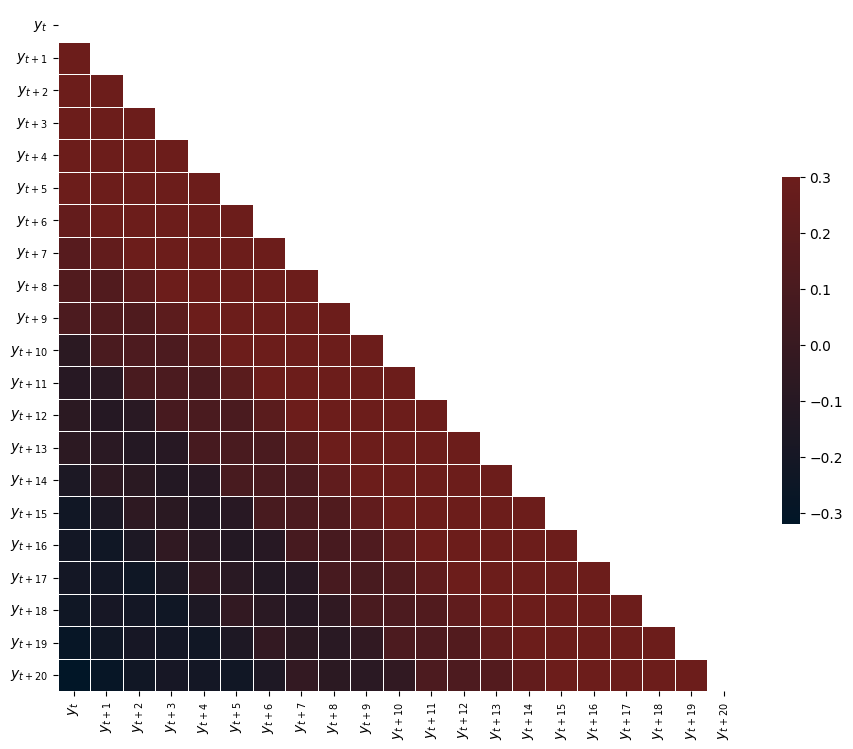

In [81]:
corr_matrix_plot(avocado_df, 'Total Volume', 20, save='correlation_matrix_avocado')